In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import missingno as msno

In [2]:
df = pd.read_csv("Dataset(CleanNA).csv", low_memory=False)
df

,entityId,entityType,event,eventTime,label,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,...,sig_antianalysis_detectfile,sig_network_cnc_http,sig_removes_zoneid_ads,sig_downloader_cabby,sig_sniffer_winpcap,sig_creates_largekey,sig_infostealer_bitcoin,sig_static_detection,sig_antiav_servicestop,sig_recon_beacon
0,780,content,malware,2016-12-15T09:01:42.068+0000,APT1,3d801aa5 76498be8 98e83379 d41d8cd9 913f9c49 9...,21a39751 b7847ae6 afb0f3da f6735a66 c9fab33e b...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7,b4adabef d8802580 d93fa703 a7b4b7e2 1465158f 7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,824,content,malware,2016-12-15T09:01:43.818+0000,APT1,3d801aa5 a12ac23c 98e83379 d41d8cd9 913f9c49 9...,21a39751 b7847ae6 afb0f3da f6735a66 c9fab33e b...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,825,content,malware,2016-12-15T09:01:43.857+0000,APT1,ea03fcb8 20826a3c 6bf6834f ea03fcb8 20826a3c c...,ba22de75 8dddb18d 5b59ec13 66016422 4737ac20 a...,NaN,9271b28c 2f0acaf7 ad8225f3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,826,content,malware,2016-12-15T09:01:44.085+0000,APT1,3d801aa5 9c8b24b8 437175ba 8b4939bc 080a35bc c...,888b1f30 c7ce5a43 b7847ae6 2b78df95 f666c32c d...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7,ae3912eb 6ea594a7 4cc59460 9c17a8f4 ae3912eb 3...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,679,content,malware,2016-12-15T09:01:36.290+0000,APT1,8d6095a6 0f4137ed 3d801aa5 40770804 f5ddaf0c 3...,b11e642e e9b9792a be7c3552 395f4f47 ce04b343 a...,NaN,9271b28c 2f0acaf7 ad8225f3,1426c3e4 0004a5f9 0cc49ed3 5b9f997d ac130e01 3...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,1577487,content,malware,2017-04-22T16:24:17.276+0000,shadowbrokers,3d801aa5 4f9e9fa5 06416233 06416233 202cb962 7...,a5c1f7de c9fab33e 8c920606 82b1a48c 839ca61c 6...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7 f64ccb6c,69445d1d 439092c3 04633d1c 0736b5c8 01dac4a9 9...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3e6407d8 ce9cb2d2,NaN,NaN
6028,1577776,content,malware,2017-04-22T16:24:30.030+0000,shadowbrokers,3d801aa5 e37999b6 06416233 06416233 202cb962 7...,8c920606 6188f543 492fb4db 75a0e17c 21a39751 8...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7 f64ccb6c,252ff5cf 04633d1c 5e711fef 425da0cc 972b1e62 5...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3e6407d8 b6e2ef7b,NaN,NaN
6029,1577487,content,malware,2017-04-22T16:24:17.307+0000,shadowbrokers,3d801aa5 4f9e9fa5 06416233 06416233 202cb962 7...,a5c1f7de c9fab33e 8c920606 82b1a48c 839ca61c 6...,NaN,9271b28c 2f0acaf7 ad8225f3 2f0acaf7 f64ccb6c,69445d1d 439092c3 04633d1c 0736b5c8 01dac4a9 9...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3e6407d8 ce9cb2d2,NaN,NaN
6030,1577779,content,malware,2017-04-22T16:24:41.248+0000,shadowbrokers,NaN,4d2b4394 224eda3d fba68e81 873ae4b5 aa2d6e4f 7...,NaN,9271b28c 2f0acaf7 ad8225f3 f64ccb6c,3e29fd09 75df408e c9f37139 c9f37139 ba79f5da a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
x_var = df.iloc[:, 5:60].columns
y_var = df.iloc[:, 5:60].count().sort_values(ascending=False)

apt1 = df.loc[df['label'] == 'APT1']
crypto = df.loc[df['label'] == 'Crypto']
locker = df.loc[df['label'] == 'Locker']
zeus = df.loc[df['label'] == 'Zeus']
shdowb = df.loc[df['label'] == 'shadowbrokers']

vapt1 = apt1.iloc[:, 5:60].count()
vcrypto = crypto.iloc[:, 5:60].count()
vlocker = locker.iloc[:, 5:60].count()
vzeus = zeus.iloc[:, 5:60].count()
vshdowb = shdowb.iloc[:, 5:60].count()

print(vshdowb.sort_values(ascending=False))

str                                 1270
pe_sec_name                         1270
pe_sec_character                    1270
pe_sec_entropy                      1270
pe_imports                          1268
sig_antivirus_virustotal            1202
reg_access                           762
reg_read                             762
file_access                          718
file_read                            706
api_resolv                           270
mutex_access                         134
net_dns                               98
sig_packer_entropy                    88
file_write                            20
net_con                               18
net_http                              18
file_drop                             16
sig_static_pe_anomaly                  8
sig_stealth_timeout                    8
cmd_exec                               6
sig_dropper                            4
sig_reads_self                         4
sig_stealth_file                       4
sig_packer_upx  

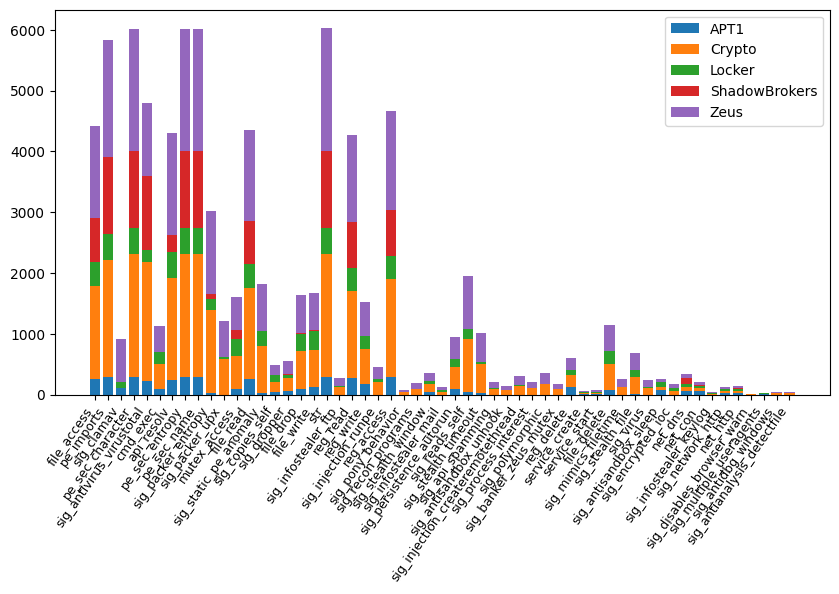

In [4]:
bot_bar3 = (vcrypto+vapt1)+vlocker
bot_bar4 = bot_bar3+vshdowb

plt.figure(figsize=(10,5))

plt.bar(x_var, vapt1, label="APT1")
plt.bar(x_var, vcrypto, bottom=vapt1, label="Crypto")
plt.bar(x_var, vlocker, bottom=(vcrypto+vapt1), label="Locker")
plt.bar(x_var, vshdowb, bottom=bot_bar3, label="ShadowBrokers")
plt.bar(x_var, vzeus, bottom=bot_bar4, label="Zeus")

plt.xticks(rotation=55, horizontalalignment='right', fontsize='9')
plt.legend(loc='best')
plt.show()

In [5]:
df2 = pd.read_csv("Dataset(LabelEncoder).csv", low_memory=False)
df2.head()

,label,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,cmd_exec,api_resolv,pe_sec_entropy,pe_sec_name,...,sig_antianalysis_detectfile,sig_network_cnc_http,sig_removes_zoneid_ads,sig_downloader_cabby,sig_sniffer_winpcap,sig_creates_largekey,sig_infostealer_bitcoin,sig_static_detection,sig_antiav_servicestop,sig_recon_beacon
0,0,764,129,560,81,2280,102,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
1,0,984,129,560,81,2018,112,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
2,0,2164,1394,560,77,2018,541,237,124,207,...,2,12,5,2,2,3,0,231,4,11
3,0,946,962,560,81,2214,527,1212,183,211,...,2,12,5,2,2,3,0,231,4,11
4,0,1743,1345,560,77,216,144,634,73,207,...,2,12,5,2,2,3,0,231,4,11


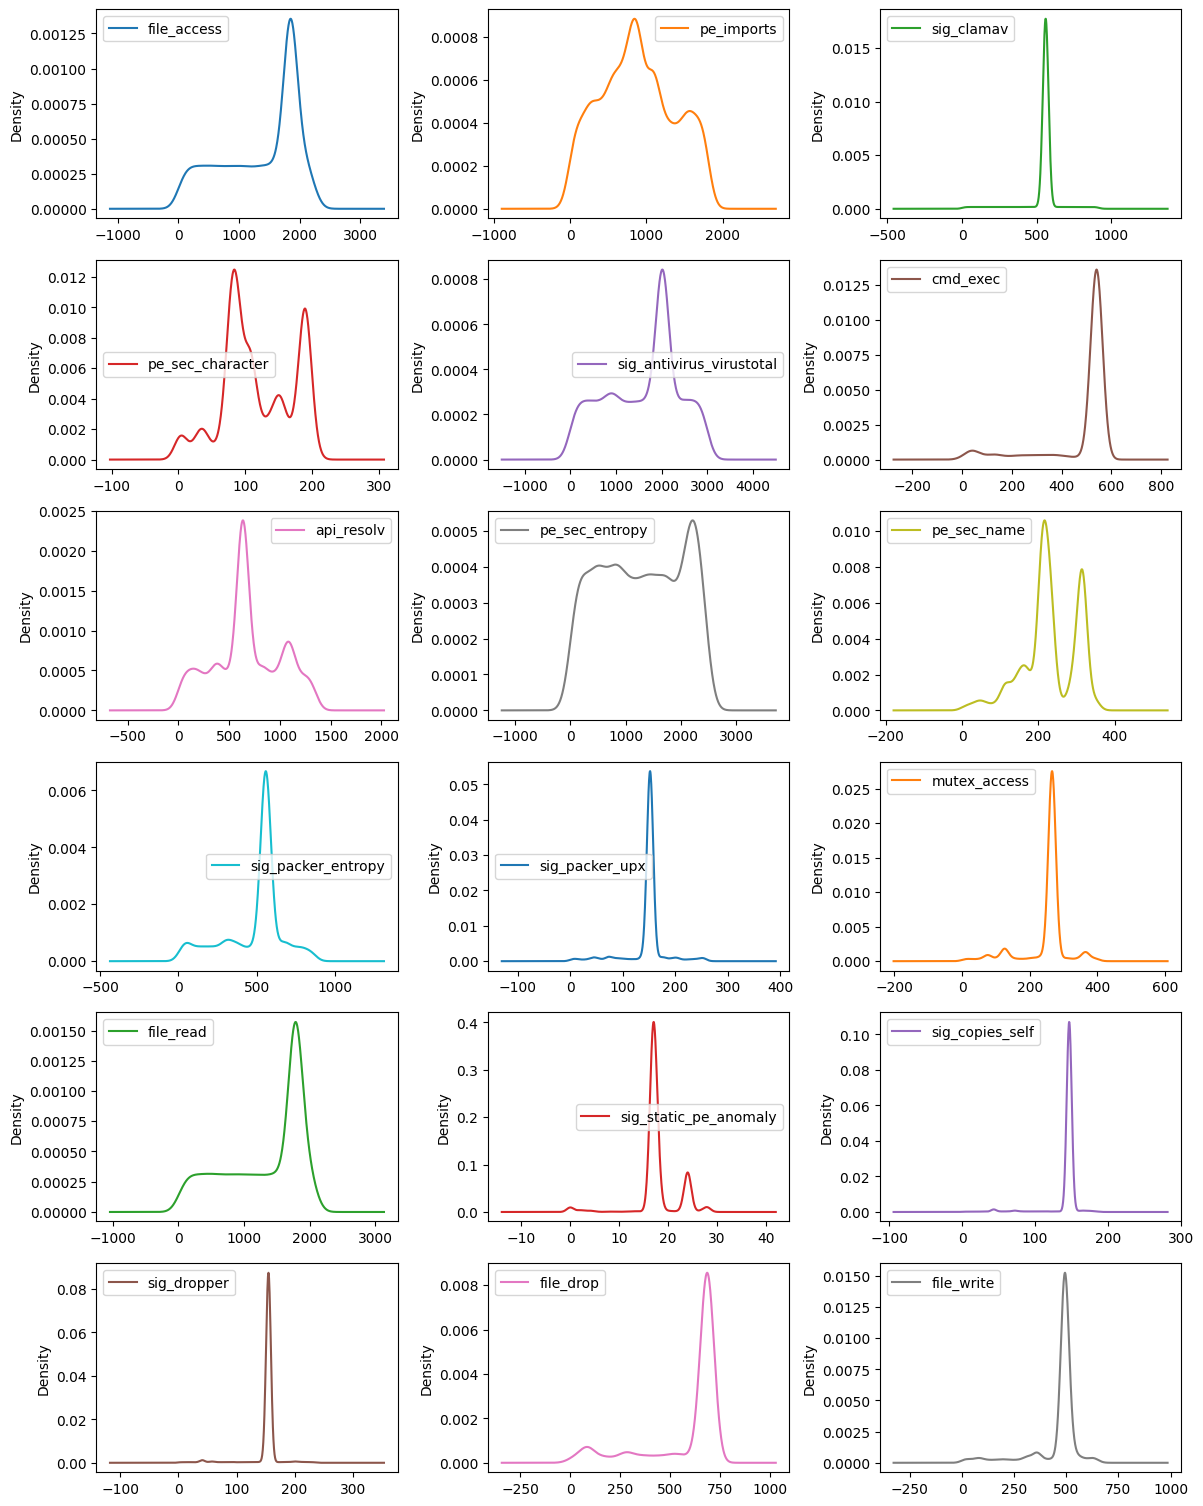

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df2.iloc[:, 1:19].plot(kind='density', figsize=(14, 19), subplots=True, layout=(6,3), sharex=False)
plt.subplots_adjust(wspace=0.3)
plt.show()

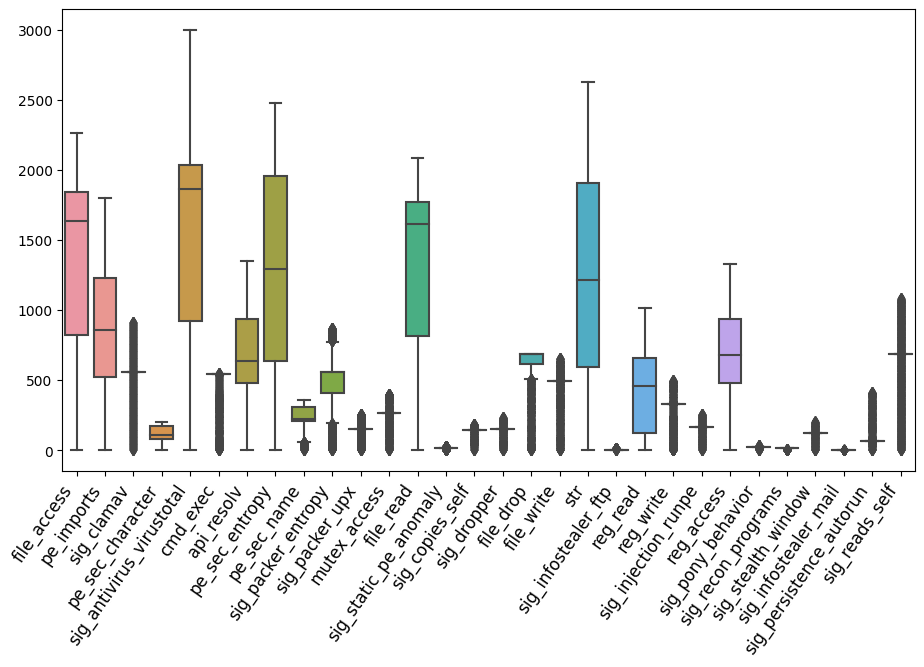

In [7]:
plt.figure(figsize=(11,6))
sns.boxplot(data = df2.iloc[:, 1:31])
plt.xticks(rotation=55, horizontalalignment='right', fontsize='12')
plt.show()

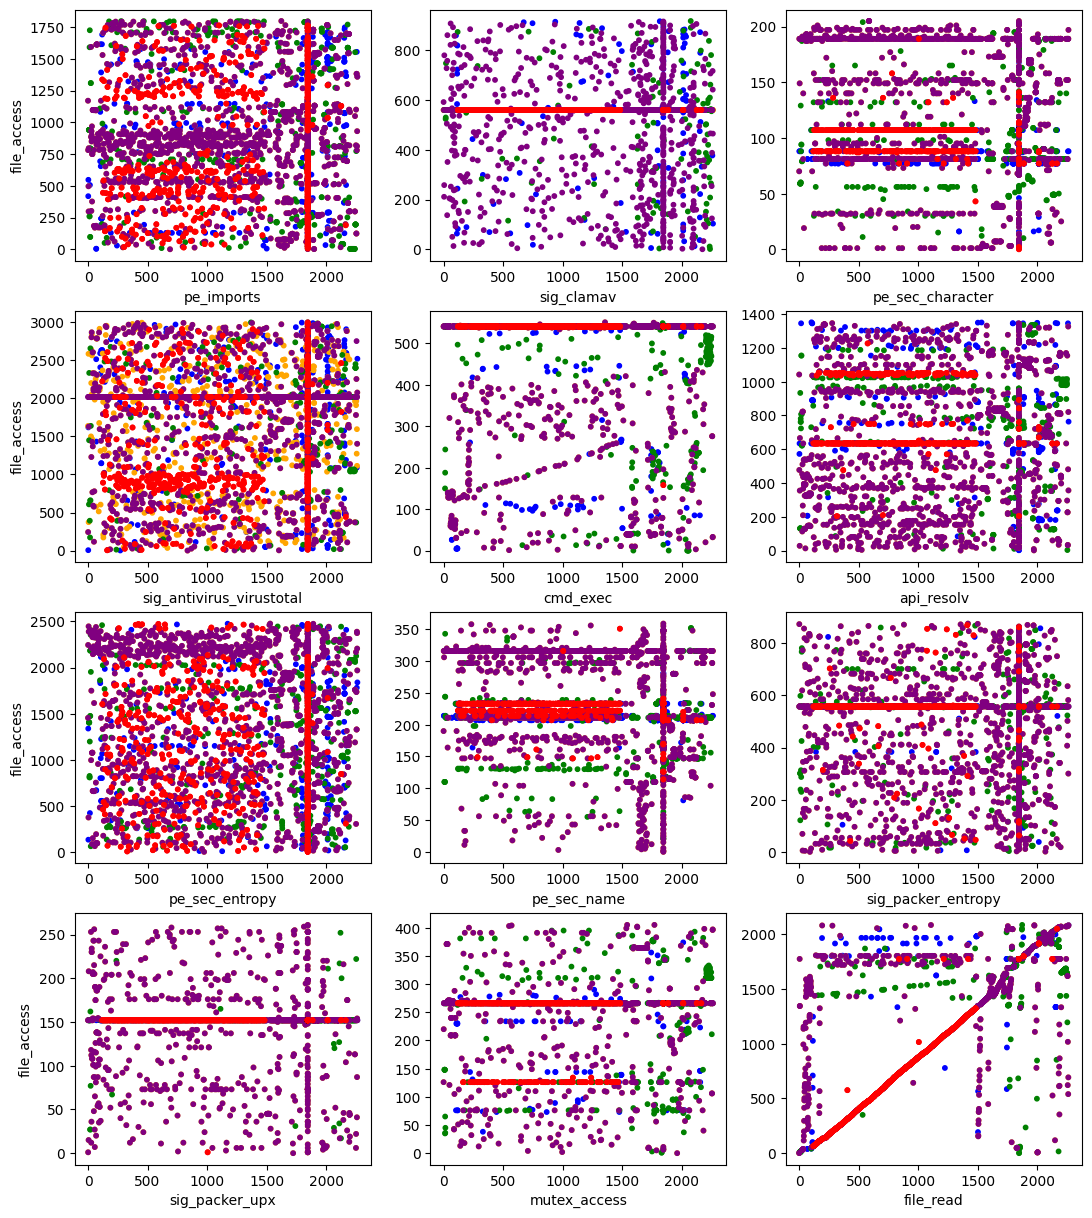

In [14]:
import matplotlib.pyplot as plt

# Define the colors for different labels
colors = {0: 'blue', 1: 'orange', 2: 'green', 3: 'purple', 4: 'red'}

# Create subplots with appropriate dimensions
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(13, 15))

# Plot scatter plots
ax[0][0].scatter(df2["file_access"], df2["pe_imports"], s=10, c=df2['label'].map(colors))
ax[0][1].scatter(df2["file_access"], df2["sig_clamav"], s=10, c=df2['label'].map(colors))
ax[0][2].scatter(df2["file_access"], df2["pe_sec_character"], s=10, c=df2['label'].map(colors))

ax[1][0].scatter(df2["file_access"], df2["sig_antivirus_virustotal"], s=10, c=df2['label'].map(colors))
ax[1][1].scatter(df2["file_access"], df2["cmd_exec"], s=10, c=df2['label'].map(colors))
ax[1][2].scatter(df2["file_access"], df2["api_resolv"], s=10, c=df2['label'].map(colors))

ax[2][0].scatter(df2["file_access"], df2["pe_sec_entropy"], s=10, c=df2['label'].map(colors))
ax[2][1].scatter(df2["file_access"], df2["pe_sec_name"], s=10, c=df2['label'].map(colors))
ax[2][2].scatter(df2["file_access"], df2["sig_packer_entropy"], s=10, c=df2['label'].map(colors))

ax[3][0].scatter(df2["file_access"], df2["sig_packer_upx"], s=10, c=df2['label'].map(colors))
ax[3][1].scatter(df2["file_access"], df2["mutex_access"], s=10, c=df2['label'].map(colors))
ax[3][2].scatter(df2["file_access"], df2["file_read"], s=10, c=df2['label'].map(colors))

# Set labels for specific axes
ax[0][0].set_ylabel('file_access')
ax[1][0].set_ylabel('file_access')
ax[2][0].set_ylabel('file_access')
ax[3][0].set_ylabel('file_access')

# Set x-axis labels
ax[0][0].set_xlabel('pe_imports')
ax[0][1].set_xlabel('sig_clamav')
ax[0][2].set_xlabel('pe_sec_character')
ax[1][0].set_xlabel('sig_antivirus_virustotal')
ax[1][1].set_xlabel('cmd_exec')
ax[1][2].set_xlabel('api_resolv')
ax[2][0].set_xlabel('pe_sec_entropy')
ax[2][1].set_xlabel('pe_sec_name')
ax[2][2].set_xlabel('sig_packer_entropy')
ax[3][0].set_xlabel('sig_packer_upx')
ax[3][1].set_xlabel('mutex_access')
ax[3][2].set_xlabel('file_read')

# Show the plot
plt.show()

In [17]:
df2.iloc[:, 1:65].describe()

,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,cmd_exec,api_resolv,pe_sec_entropy,pe_sec_name,sig_packer_entropy,...,sig_antianalysis_detectfile,sig_network_cnc_http,sig_removes_zoneid_ads,sig_downloader_cabby,sig_sniffer_winpcap,sig_creates_largekey,sig_infostealer_bitcoin,sig_static_detection,sig_antiav_servicestop,sig_recon_beacon
count,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,...,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000,6032.000000
mean,1358.229111,879.618866,544.612235,117.780836,1599.314987,484.202752,678.161306,1278.584383,229.285312,490.635776,...,2.006631,11.995358,5.000995,2.019397,1.994032,2.997845,0.003150,219.336207,3.998176,10.989556
std,635.836828,479.779007,109.736319,52.814402,801.084471,138.840451,332.650870,732.261753,70.892592,186.953700,...,0.096132,0.522717,0.138683,0.453935,0.107569,0.069310,0.061674,40.264361,0.143955,0.290895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,824.000000,526.000000,560.000000,81.000000,925.000000,541.000000,479.750000,637.000000,207.000000,411.000000,...,2.000000,12.000000,5.000000,2.000000,2.000000,3.000000,0.000000,231.000000,4.000000,11.000000
50%,1635.500000,856.000000,560.000000,107.000000,1868.500000,541.000000,634.000000,1292.000000,222.000000,557.000000,...,2.000000,12.000000,5.000000,2.000000,2.000000,3.000000,0.000000,231.000000,4.000000,11.000000
75%,1846.000000,1233.000000,560.000000,173.000000,2035.250000,541.000000,939.000000,1961.250000,306.000000,557.000000,...,2.000000,12.000000,5.000000,2.000000,2.000000,3.000000,0.000000,231.000000,4.000000,11.000000
max,2263.000000,1798.000000,918.000000,205.000000,2999.000000,551.000000,1351.000000,2477.000000,359.000000,875.000000,...,3.000000,22.000000,8.000000,17.000000,2.000000,4.000000,2.000000,249.000000,7.000000,13.000000


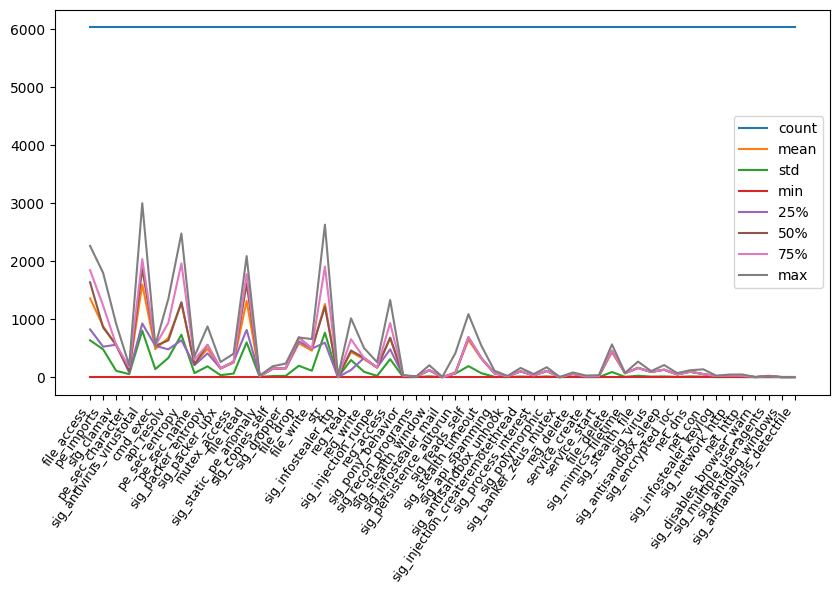

In [18]:
from pandas.plotting import table
import numpy as np

plt.figure(figsize=(10,5))

plt.plot(df2.iloc[:, 1:56].describe().T)
plt.xticks(rotation=55, horizontalalignment='right', fontsize='9')
plt.legend(df2.iloc[:, 1:56].describe().T, loc ="best")
plt.show()

<AxesSubplot: >

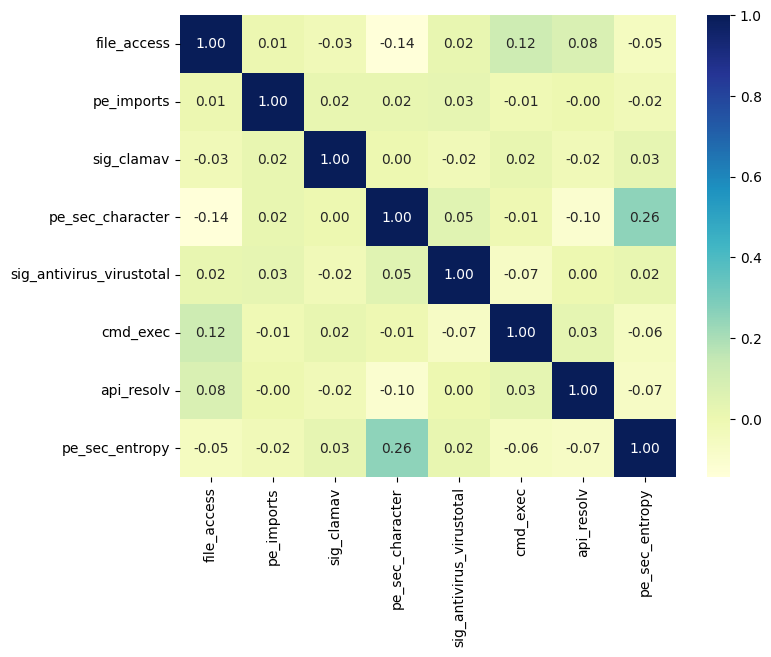

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df2.iloc[:, 1:9].corr(),cbar=True,annot=True, cmap="YlGnBu", fmt=".2f")

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df2.iloc[:, 1:16].corr()

,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,cmd_exec,api_resolv,pe_sec_entropy,pe_sec_name,sig_packer_entropy,sig_packer_upx,mutex_access,file_read,sig_static_pe_anomaly,sig_copies_self
file_access,1.00,0.01,-0.03,-0.14,0.02,0.12,0.08,-0.05,-0.19,0.00,0.00,0.13,0.81,-0.07,0.08
pe_imports,0.01,1.00,0.02,0.02,0.03,-0.01,-0.00,-0.02,-0.01,0.06,0.01,-0.08,0.03,0.09,-0.05
sig_clamav,-0.03,0.02,1.00,0.00,-0.02,0.02,-0.02,0.03,0.03,-0.01,0.02,0.00,-0.03,-0.02,-0.01
pe_sec_character,-0.14,0.02,0.00,1.00,0.05,-0.01,-0.10,0.26,0.54,-0.02,-0.17,-0.11,-0.04,-0.06,0.08
sig_antivirus_virustotal,0.02,0.03,-0.02,0.05,1.00,-0.07,0.00,0.02,0.00,-0.02,-0.04,-0.01,0.02,0.02,-0.02
cmd_exec,0.12,-0.01,0.02,-0.01,-0.07,1.00,0.03,-0.06,0.01,0.00,0.01,0.12,0.02,0.01,0.46
api_resolv,0.08,-0.00,-0.02,-0.10,0.00,0.03,1.00,-0.07,-0.19,0.04,0.05,-0.06,0.06,0.16,0.08
pe_sec_entropy,-0.05,-0.02,0.03,0.26,0.02,-0.06,-0.07,1.00,0.24,-0.04,-0.15,0.02,-0.03,-0.01,-0.02
pe_sec_name,-0.19,-0.01,0.03,0.54,0.00,0.01,-0.19,0.24,1.00,-0.03,-0.16,-0.07,-0.12,-0.07,0.06
sig_packer_entropy,0.00,0.06,-0.01,-0.02,-0.02,0.00,0.04,-0.04,-0.03,1.00,-0.03,-0.01,-0.00,0.01,-0.02


In [24]:
df3 = pd.read_csv("Dataset(SMOTE).csv", low_memory=False)
df3

,label,file_access,pe_imports,sig_clamav,pe_sec_character,sig_antivirus_virustotal,cmd_exec,api_resolv,pe_sec_entropy,pe_sec_name,...,sig_antianalysis_detectfile,sig_network_cnc_http,sig_removes_zoneid_ads,sig_downloader_cabby,sig_sniffer_winpcap,sig_creates_largekey,sig_infostealer_bitcoin,sig_static_detection,sig_antiav_servicestop,sig_recon_beacon
0,0,764,129,560,81,2280,102,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
1,0,984,129,560,81,2018,112,1302,1147,211,...,2,12,5,2,2,3,0,231,4,11
2,0,2164,1394,560,77,2018,541,237,124,207,...,2,12,5,2,2,3,0,231,4,11
3,0,946,962,560,81,2214,527,1212,183,211,...,2,12,5,2,2,3,0,231,4,11
4,0,1743,1345,560,77,216,144,634,73,207,...,2,12,5,2,2,3,0,231,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,4,666,561,560,106,852,541,634,2102,232,...,2,12,5,2,2,3,0,230,4,11
10096,4,1099,427,560,107,2018,541,634,309,233,...,2,12,5,2,2,3,0,231,4,11
10097,4,1856,1407,560,81,1573,541,639,1626,211,...,2,12,5,2,2,3,0,71,4,11
10098,4,1846,1373,560,102,331,541,634,1354,230,...,2,12,5,2,2,3,0,118,4,11


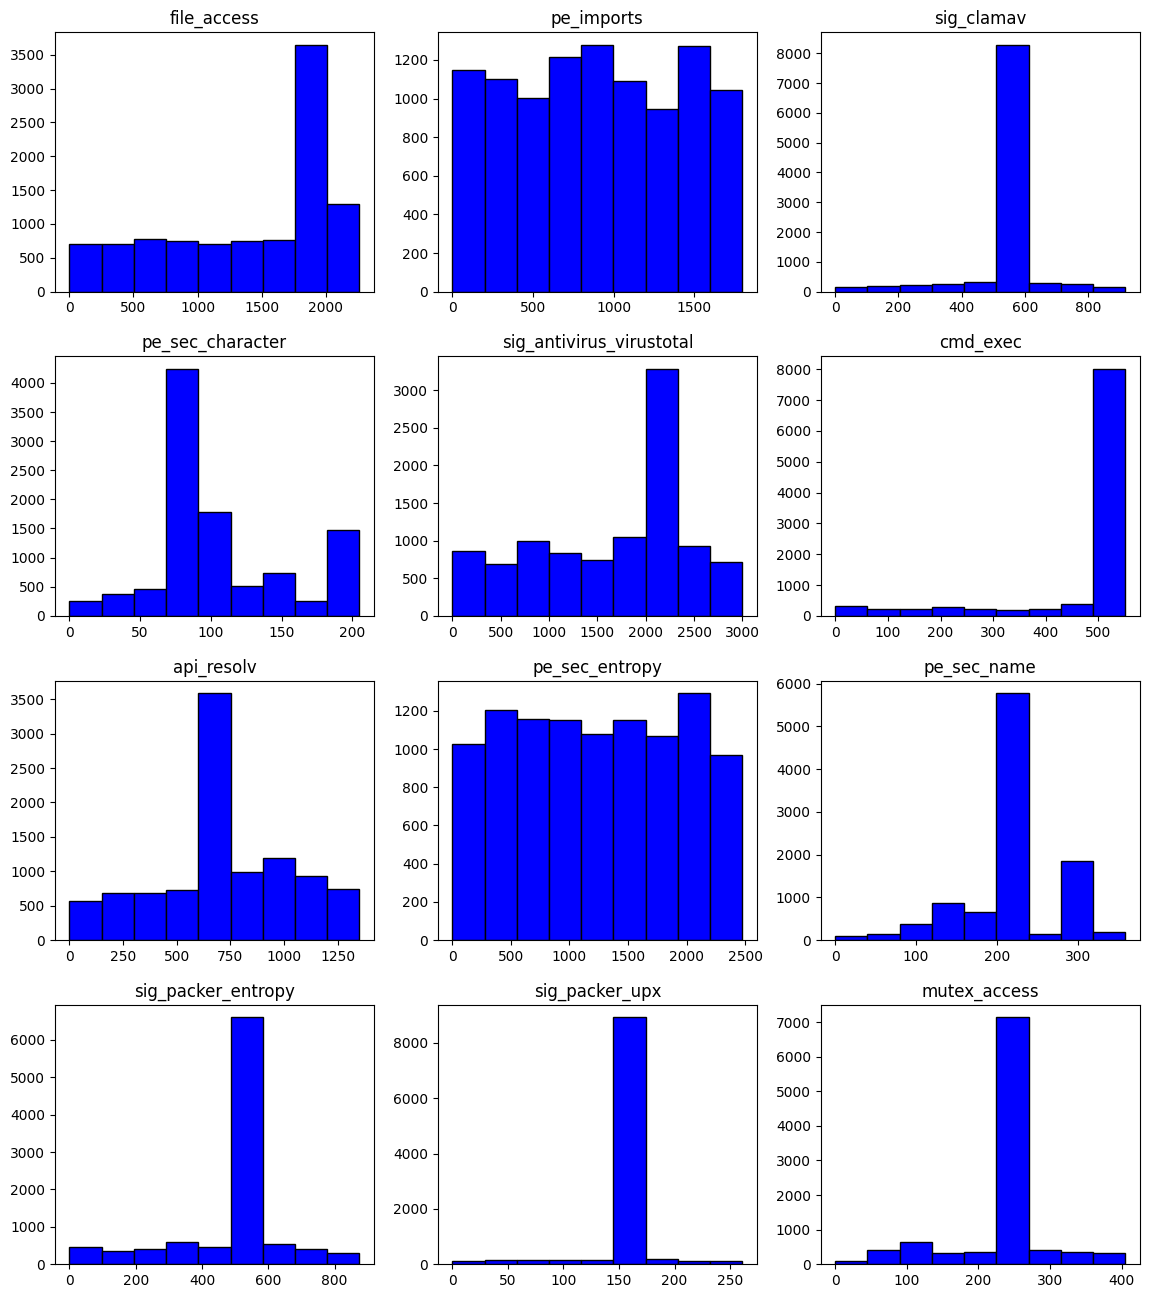

In [25]:
fig , ax = plt.subplots(nrows = 4, ncols = 3, figsize=(14,16))

ax[0][0].hist(df3['file_access'], bins=9, color='blue', edgecolor='black', align='mid')
ax[0][0].set_title('file_access')
ax[0][1].hist(df3['pe_imports'], bins=9, color='blue', edgecolor='black', align='mid')
ax[0][1].set_title('pe_imports')
ax[0][2].hist(df3['sig_clamav'], bins=9, color='blue', edgecolor='black')
ax[0][2].set_title('sig_clamav')

ax[1][0].hist(df3['pe_sec_character'], bins=9, color='blue', edgecolor='black')
ax[1][0].set_title('pe_sec_character')
ax[1][1].hist(df3['sig_antivirus_virustotal'], bins=9, color='blue', edgecolor='black')
ax[1][1].set_title('sig_antivirus_virustotal')
ax[1][2].hist(df3['cmd_exec'], bins=9, color='blue', edgecolor='black')
ax[1][2].set_title('cmd_exec')

ax[2][0].hist(df3['api_resolv'], bins=9, color='blue', edgecolor='black')
ax[2][0].set_title('api_resolv')
ax[2][1].hist(df3['pe_sec_entropy'], bins=9, color='blue', edgecolor='black')
ax[2][1].set_title('pe_sec_entropy')
ax[2][2].hist(df3['pe_sec_name'], bins=9, color='blue', edgecolor='black')
ax[2][2].set_title('pe_sec_name')

ax[3][0].hist(df3['sig_packer_entropy'], bins=9, color='blue', edgecolor='black')
ax[3][0].set_title('sig_packer_entropy')
ax[3][1].hist(df3['sig_packer_upx'], bins=9, color='blue', edgecolor='black')
ax[3][1].set_title('sig_packer_upx')
ax[3][2].hist(df3['mutex_access'], bins=9, color='blue', edgecolor='black')
ax[3][2].set_title('mutex_access')

plt.subplots_adjust(hspace=0.25)
plt.show()